In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3* X[:,0]**2 +0.5* np.random.randn(100)

In [ ]:
df = pd.DataFrame()

In [ ]:
df['X'] = X.reshape(100)
df['y'] = y

In [ ]:
df

,X,y
0,-0.125460,0.090744
1,0.450714,0.459926
2,0.231994,0.207344
3,0.098658,-0.964584
4,-0.343981,0.245134
...,...,...
95,-0.006204,-0.407790
96,0.022733,-0.037001
97,-0.072459,0.186327
98,-0.474581,0.814026


Text(0.5, 1.0, 'X vs Y')

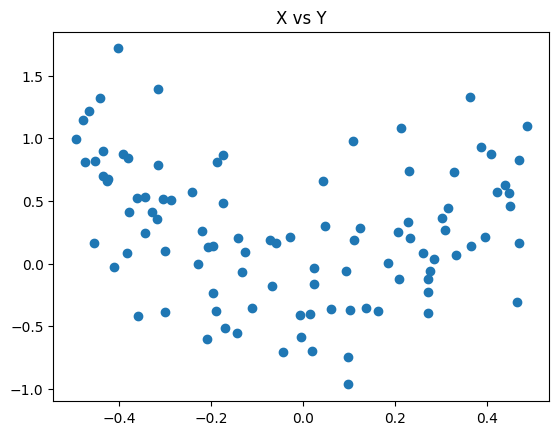

In [ ]:
plt.scatter(df['X'], df['y'])
plt.title('X vs Y')

In [ ]:
df['pred1'] = df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.090744,0.264972
1,0.450714,0.459926,0.264972
2,0.231994,0.207344,0.264972
3,0.098658,-0.964584,0.264972
4,-0.343981,0.245134,0.264972
...,...,...,...
95,-0.006204,-0.407790,0.264972
96,0.022733,-0.037001,0.264972
97,-0.072459,0.186327,0.264972
98,-0.474581,0.814026,0.264972


In [ ]:
df['res1'] = df['y']-df['pred1']

In [ ]:
df

,X,y,pred1,res1
0,-0.125460,0.090744,0.264972,-0.174228
1,0.450714,0.459926,0.264972,0.194954
2,0.231994,0.207344,0.264972,-0.057628
3,0.098658,-0.964584,0.264972,-1.229556
4,-0.343981,0.245134,0.264972,-0.019839
...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762
96,0.022733,-0.037001,0.264972,-0.301973
97,-0.072459,0.186327,0.264972,-0.078645
98,-0.474581,0.814026,0.264972,0.549054


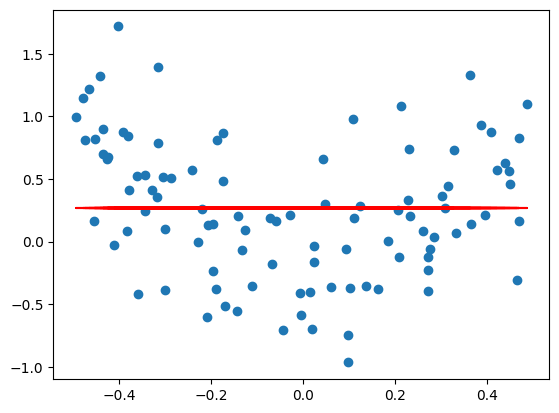

In [ ]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree1 = DecisionTreeRegressor(max_depth=3)

In [ ]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_depth=3)

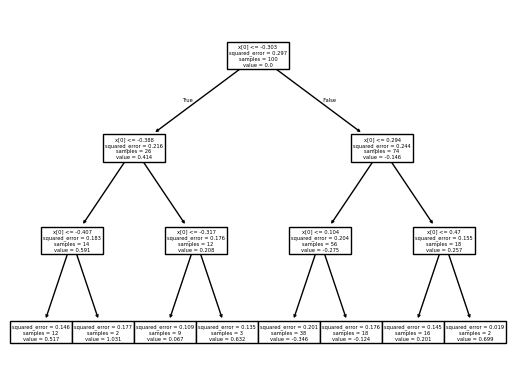

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [ ]:
# Generating X_test

X_test = np.linspace(-0.5,0.5,500)

In [ ]:
y_pred = 0.264972 +tree1.predict(X_test.reshape(500,1))

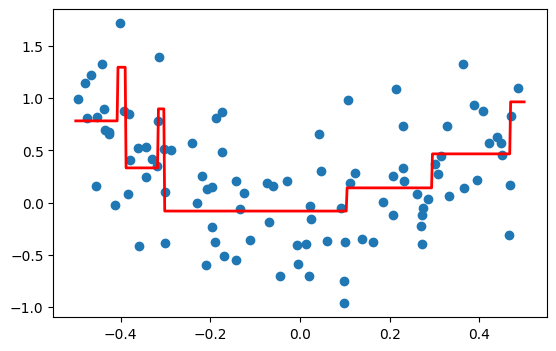

In [ ]:
plt.figure(figsize= (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])

In [ ]:
df['pred2'] = 0.264972 + tree1.predict(df['X'].values.reshape(100,1))

In [ ]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.090744,0.264972,-0.174228,-0.081338
1,0.450714,0.459926,0.264972,0.194954,0.466413
2,0.231994,0.207344,0.264972,-0.057628,0.140799
3,0.098658,-0.964584,0.264972,-1.229556,-0.081338
4,-0.343981,0.245134,0.264972,-0.019839,0.332139
...,...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762,-0.081338
96,0.022733,-0.037001,0.264972,-0.301973,-0.081338
97,-0.072459,0.186327,0.264972,-0.078645,-0.081338
98,-0.474581,0.814026,0.264972,0.549054,0.782379


In [ ]:
df['res2'] = df['y']-df['pred2']

In [ ]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.090744,0.264972,-0.174228,-0.081338,0.172082
1,0.450714,0.459926,0.264972,0.194954,0.466413,-0.006487
2,0.231994,0.207344,0.264972,-0.057628,0.140799,0.066545
3,0.098658,-0.964584,0.264972,-1.229556,-0.081338,-0.883246
4,-0.343981,0.245134,0.264972,-0.019839,0.332139,-0.087005
...,...,...,...,...,...,...
95,-0.006204,-0.407790,0.264972,-0.672762,-0.081338,-0.326452
96,0.022733,-0.037001,0.264972,-0.301973,-0.081338,0.044337
97,-0.072459,0.186327,0.264972,-0.078645,-0.081338,0.267665
98,-0.474581,0.814026,0.264972,0.549054,0.782379,0.031648


In [ ]:

tree2 = DecisionTreeRegressor(max_depth=8)

In [ ]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_depth=8)

In [ ]:
y_pred = 0.264972 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2])

Text(0.5, 1.0, 'X vs y')

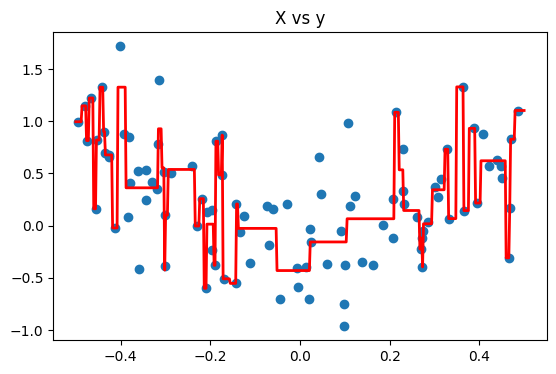

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred,linewidth = 2, color= 'red')
plt.scatter(df['X'], df['y'])
plt.title("X vs y")

In [ ]:
def gradient_boost(X, y, number, lr, count =1, regs =[], foo = None):
  if number == 0:
    return
  else:
    # do Gradient boosting

    if count >1:
      y = y- regs[-1].predict(X)
    else:
      foo = y
  tree_reg = DecisionTreeRegressor ( max_depth = 5, random_state=42)
  tree_reg.fit(X, y)

  regs.append(tree_reg)

  x1 = np.linspace(-0.5,0.5,500)
  y_pred = sum(lr* regressor.predict (x1.reshape(-1,1)) for regressor in regs)

  print(number)
  plt.figure()
  plt.plot(x1,y_pred, linewidth =2)
  plt.plot(X[:,0], foo,'r.')
  plt.show()

  gradient_boost(X, y, number-1, lr,count+1, regs, foo = foo)

8


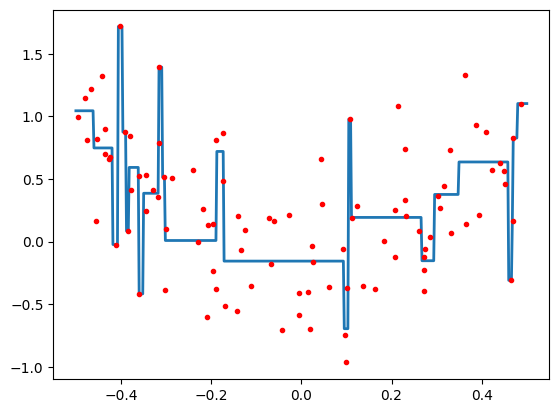

7


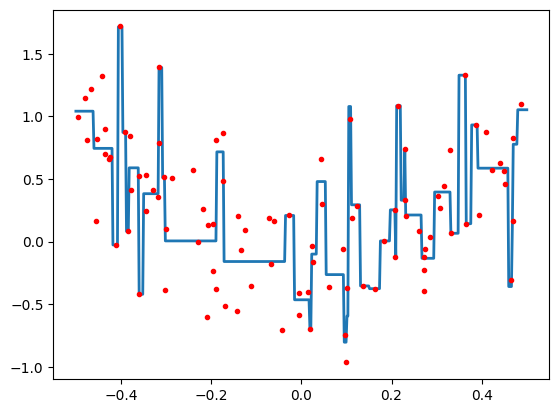

6


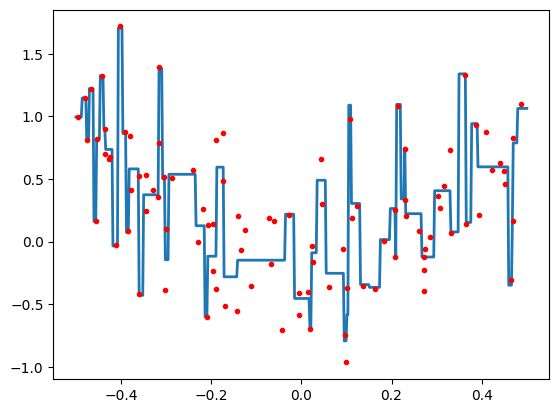

5


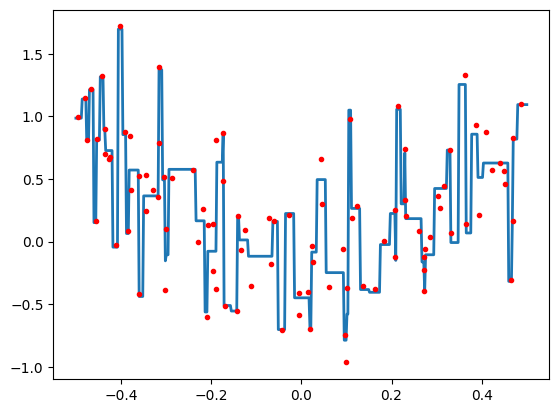

4


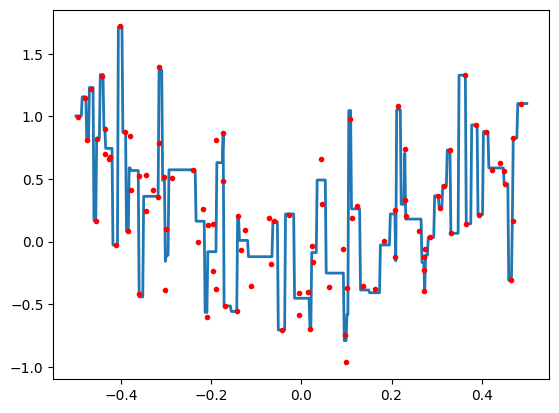

3


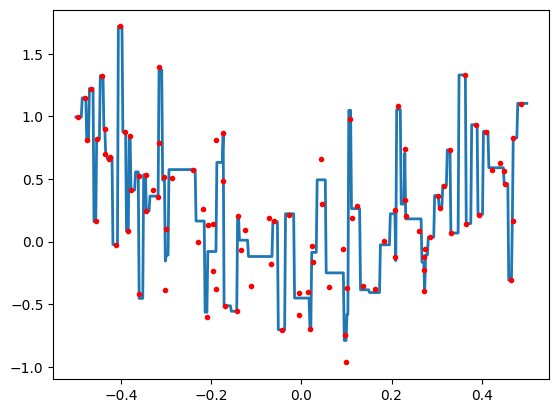

2


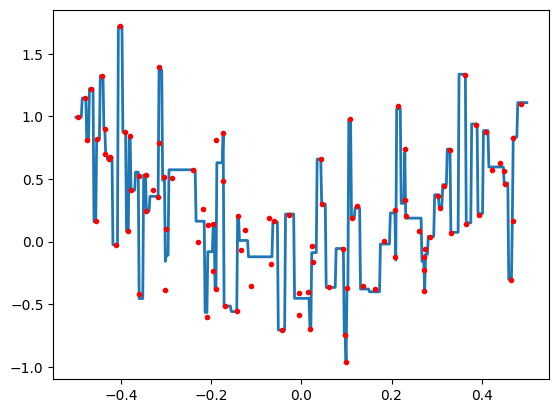

1


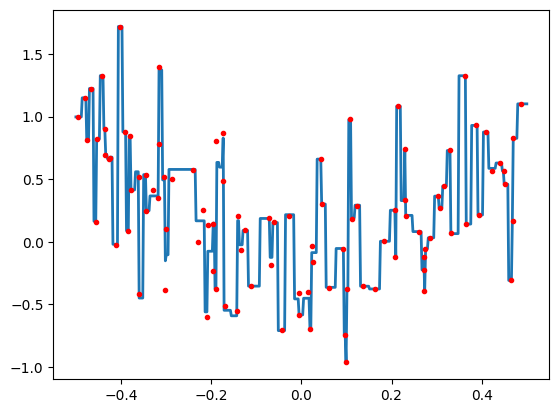

In [ ]:
np.random.seed(42)
X = np.random.rand(100,1) -0.5

y = 3* X[:,0]**2 + 0.5* np.random.randn(100)
gradient_boost(X, y, 8, lr=1)